# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices of your choice you wish to sample from the dataset
indices = [1,367,243]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,3477,894,534,1457,252,342
2,11210,3576,5119,561,1682,2398


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
1     44.1  84.8     71.8    54.5              70.5          74.1
367   27.7  10.5      2.3    48.9              24.3          20.9
243   60.7  48.6     52.7    20.5              62.3          84.3


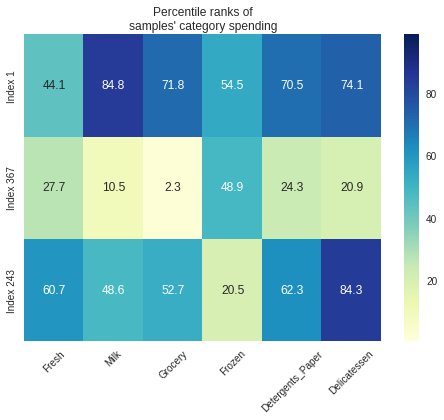

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Note that we dropped the origianl indices and re-indexed. For this section, I will refer to the new indices for the answer.

<b>Wholesale customer 2) </b>Fre:11210 M:3576 G:5119 Fro:561 D_P:1682 Deli:2398

This customer appears to be a restureant or cafe in my opinion, possibly something like a deli. The coustomer falls in above the 75 percentile in the delicatessen caterogry and above the 50 percentile in fresh and det_paper products, which leads me to think they serve food.

<b>Wholesale customer 1) </b>Fre:3477 M:894 G:534 Fro:1457 D_P:252 Deli:342

This customer is below the 50 percentile in all categories and below the 25 percentile in 4 out of 6. That leads me to believe this is something like a hotel or generic retail store. Something that doesn't carry a lot of food products. 

<b>Whoelsale customer 0) </b>Fre:7057 M:9810 G:9568 Fro:1762 D_P:3293 Deli:1776

This customer has a grocery category close to the 75 percentile and milk that is above the 75 percentile. That leads me to beleive it may be a small retail store like a grocery or convenience store. I believe small convience stores sell a lot of milk, in almost all forms of entertainment there is always a 'can you pick up milk while you are out scene' where they pick up milk at a small corner store. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
#  Make a copy of the DataFrame, using the 'drop' function to drop the given feature
#drop milk
new_data = data.drop('Milk', axis = 1)

#make milk target attr.
milk = data['Milk']

# Split the data into training and testing sets using the given feature as the target
#import function to Split arrays or matrices into random train and test subsets 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, milk, 
                                                    train_size=0.75, random_state=1)

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

#print regressor.get_params

# Report the score of the prediction using the testing set
# Returns the coefficient of determination R^2 of the prediction
score = regressor.score(X_test, y_test)
print "R Score: " + str(score)

R Score: 0.515849943807


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

<b>Milk:</b>
I attempted to predict the amount of money spent on milk using the other categories as features. The decision tree regressor's prediction leads to a R^2 score of approximately 0.51. That means the features can explain 51% of the vairiance in the the milk spending. 

Because the other features do not capture a large enough portion of the variance in the milk feature, I beleive milk will be necessary for identifying spending habits.

Note: Since R^2 can also be interpretted as the correlation of the true target, and the model's prediction for the target sqaured. We can could also say that the other features are not a linear combination of the milk feature; therefore, milk adds information by being a feature in the regression. The technical way to say this is: since milk was not perfectly multicolinear (or close to perfect) with the other features, we should not drop it. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

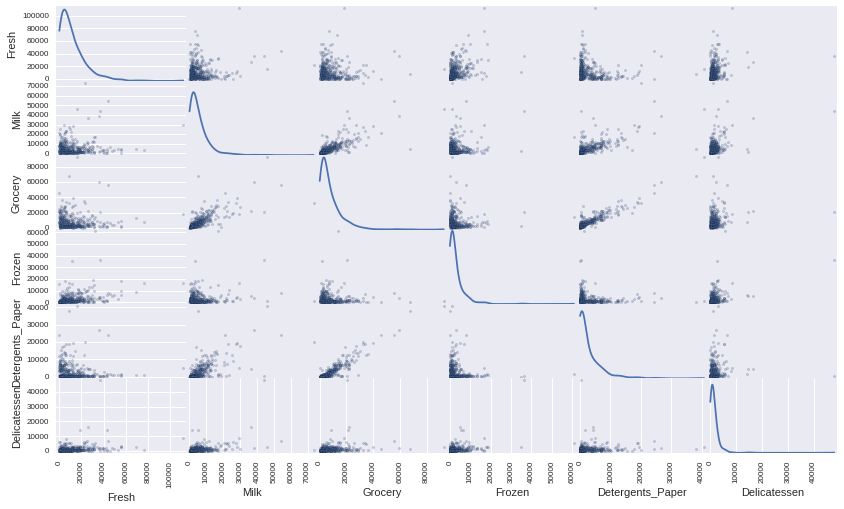

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

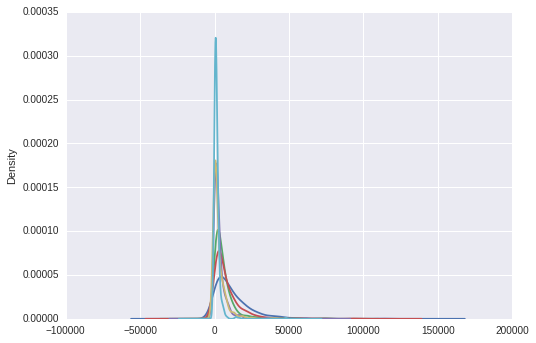

In [8]:
#plot densities
cats=list(data.columns.values)
for c in cats:
    data[c].plot.kde()

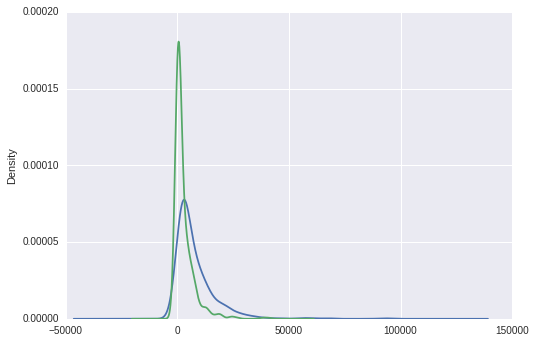

In [9]:
#plot densities just for the two that are somewhat linear
cat=['Grocery', 'Detergents_Paper']
for c in cat:
    data[c].plot.kde()

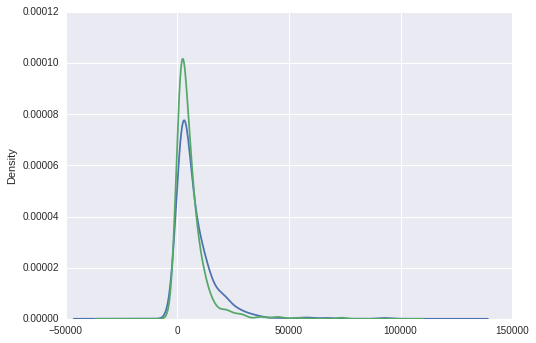

In [10]:
#plot densities just for milk and something else
ca=['Grocery', 'Milk']
for c in ca:
    data[c].plot.kde()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

(Strong) correlation can be interpretted as a linear like relationship between two variables. If we look at the scatter plots above the only two that have a linear like plot is grocery and detergents_paper. The others seem to provide little to no information about the other (meaning if I know x, I don't really know where y will be, the plots are just blobs). Therefore, you may be able to remove det_paper or grocery and still predict spending similarly; Though there still seems to be a particular thickness in the linear like relationship of the two that could be rather noisy (a rather large variance form a fitted line).

With that said, the plots for milk reaffirm (loosely, because the plots don't show linear combinations of features) my answer for the previous question. I can now say, no 'one' other feature can supplant milk in the learning model.

All data appears to be unimodal with a slight positive skew (larger right tails). And the top heights appear at the categories' respective mode. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

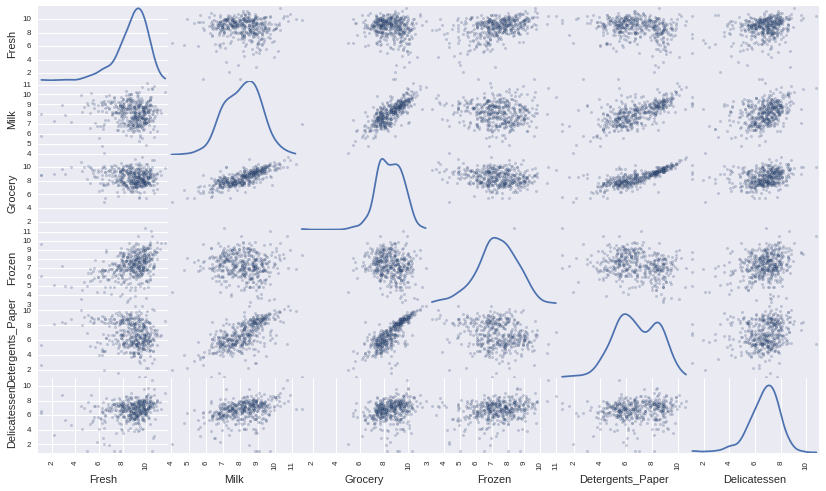

In [11]:
#  Scale the data using the natural logarithm
log_data = np.log(data)

#  Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

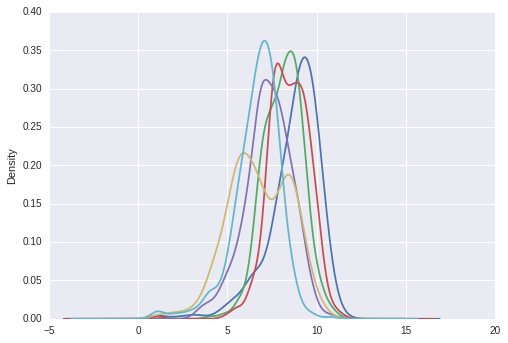

In [12]:
#plot densities after ln transform
cats=list(data.columns.values)
for c in cats:
    log_data[c].plot.kde()

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.153925,6.795706,6.280396,7.284135,5.529429,5.834811
2,9.324562,8.182000,8.540714,6.329721,7.427739,7.782390


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
# For each feature find the data points with extreme high or low values
numbers=[]
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    numbers.append((log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]).index.tolist())
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154,65,66,75,128]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [15]:
#count doubles
number=[]
for x in numbers:
    for y in x:
        number.append(y)

#count and zip into dict
idcount = [number.count(num) for num in number]
iddict=dict(zip(number,idcount))

#function to order
def Order(bag, Descending=True):
    arr=[(bag[key], key) for key in bag]
    if Descending==True:
        return sorted(arr, key=lambda x: (-x[0], x[1]))
    else:
        return sorted(arr, key=lambda x: (x[0], x[1]))

#show top of ordering
(Order(iddict))[0:6]

[(3, 154), (2, 65), (2, 66), (2, 75), (2, 128), (1, 38)]

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Observation 154 is an outlier in 3 categories: Deli, Milk, Groc
Observation 65 is an outlier in 2 categories: Frozen, Fresh
Observation 66 is an outlier in 2 categories: Deli, Fresh
Observation 75 is an outlier in 2 categories: D_P, Grocery
Observation 128 is an outlier in 2 categories: Deli, Fresh

It's difficult for me to assume that any of the data could be wrong because of human error (i.e. collected and stored the wrong number, since I don't know how it was collected). Therefore, I won't assume any of the outliers are that due to human error. With that said, I will only drop observations that were an outlier in more than one category. 

I will do this because I am assuming that these distributions are repesentative of the data. But anything that is an outlier in more than one category, is a very unlikely draw and therefore will be dropped to undo any effects from extreme observations.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

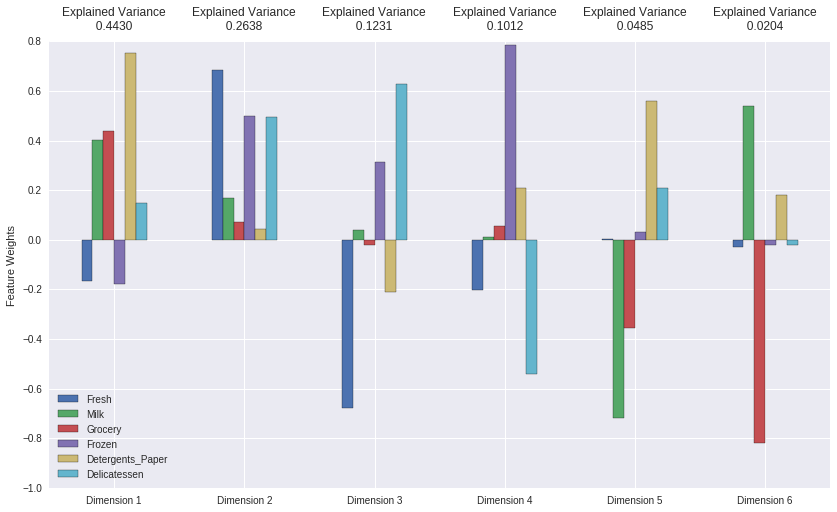

In [16]:
from sklearn.decomposition import PCA

# Apply PCA to the good data with the same number of dimensions as features
# if n_components is not set all components are kept
pca = PCA(n_components=6)
pca.fit(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [17]:
pca_samples

array([[ 1.7886645 ,  0.81225054,  0.2314744 , -0.00363127, -0.11938138,
         0.21064774],
       [-2.4629887 , -1.29622047,  0.11982634,  0.15499931,  0.84182736,
         0.87286105],
       [ 0.77616689,  0.46369552, -0.13996925, -1.34853103,  0.47990396,
         0.06028825]])

In [18]:
# Print the components and the amount of variance and sum of PCAs
print 'PCA comp:\n{}'.format(pca.components_)
print 'PCA explained var ratio:\n{}'.format(pca.explained_variance_ratio_)
print 'Cum. PCA explained var ratio:\n{}'.format(np.cumsum(pca.explained_variance_ratio_))

PCA comp:
[[-0.16746374  0.40143866  0.43811142 -0.17820975  0.75142613  0.14987105]
 [ 0.68593522  0.16722783  0.07072902  0.50054207  0.04244398  0.49414702]
 [-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
 [-0.204293    0.01281068  0.05567564  0.78544905  0.20961368 -0.54233972]
 [ 0.00261356 -0.71923846 -0.3553861   0.0330861   0.55815441  0.20918629]
 [-0.02915623  0.54018269 -0.82053348 -0.02054106  0.18238824 -0.01974794]]
PCA explained var ratio:
[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]
Cum. PCA explained var ratio:
[ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

How much variance in the data is explained in total by the first and second principal component? <b>0.4430+0.2638=0.7068; 70.68% of the variance is explained with the first two PCs.</b>

What about the first four principal components? <b>0.4430+0.2638+0.1231+0.1012=0.9311, which means 93.11% of the variance is explained with the first 4 PCAs.</b>

Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending. <b>PCA1 is made up of large positive weights in Detergents_Paper, and lesser but still sizeable positive weights on Milk and Grocery, and a still smaller postive wieght on Deli. It also correlates with a decrease in Fresh and Frozen. (This may represent spending in staples products that are purchased together.)"</b> Note: for exact feature wieghts check code directly above.

<b> PC2 is made up of all postive weights with Fresh the largest and Frozen and Deli close. THe others have low positive weights. This may be interpetted as spending on items related related to making a meal (such as buying the food to directly prep a dinner, these items are compliments).</b>

<b> PC3 is made up of a large postive weight on Deli and another positive wieght about half that on Frozen and a very small postive weight on Milk. This correlates with a large decrease in Fresh, a smaller decrease in Det_papers, and a very small decrease in Grocery. (Not sure how to intepret this, but possibly some of the fresh and deli items may be substitutes) </b>

<b> PC4 is made up of a very large postive weight on Frozen and much smaller positive wieghts on Det_paper, Grocery, and Milk. It correlates with a decrease in Deli and Fresh. </b>

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7887,0.8123,0.2315,-0.0036,-0.1194,0.2106
1,-2.4630,-1.2962,0.1198,0.1550,0.8418,0.8729
2,0.7762,0.4637,-0.1400,-1.3485,0.4799,0.0603


In [20]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.153925,6.795706,6.280396,7.284135,5.529429,5.834811
2,9.324562,8.182000,8.540714,6.329721,7.427739,7.782390


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
#  Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [22]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7887,0.8123
1,-2.4630,-1.2962
2,0.7762,0.4637


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

<b>K-means advantages:</b>K-means tries to place centroids that are most equidistant to other points in the same cluster. It performs a hard assignment, meaning all data points belong to one cluster or another. One advantage is it is faster and less expensive than 
methods that provide soft assignment. 

<b>Gaussian Mixture Model advantages:</b>
GMMs are able to define softer clusters (meaning can assign probabilities that an ob belongs to a particular cluster), which allows us to capture uncertainty. This is nice when clusters appear blended. GMM also assumes clusters are generated from a guassian distribution, therefore if obs are independent, the central limit theorem provides a good reason GMM should work.

<b>What model to chose:</b> So far the data has given no idication of any clearly, easily seperated data. Because of this I will use a GMM. Also, since we have few observations, k-means speed and cost advantage mean very little. Also, since all features are closely normal after a log transformation, a GMM should work. (I will note that I do not beleive the data to be truly independent, because resuturants, hotels, retailers, etc near each other compete for customers, therefore, there exists some dependence in the data, but the densities appearing normal "enough" defend GMM.)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn.mixture import GMM
from  sklearn.metrics import silhouette_score

for c in range(9,1,-1):
    #  Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=c).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print "cluster size of "+str(c)+" has a silhouette score of "+str(score)

cluster size of 9 has a silhouette score of 0.282159231509
cluster size of 8 has a silhouette score of 0.305664310002
cluster size of 7 has a silhouette score of 0.322542962762
cluster size of 6 has a silhouette score of 0.275939105883
cluster size of 5 has a silhouette score of 0.295441470747
cluster size of 4 has a silhouette score of 0.313275342147
cluster size of 3 has a silhouette score of 0.372313708076
cluster size of 2 has a silhouette score of 0.411818864386


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

A cluster size of 2 has the best silhouette score: 0.411818864386. 

cluster size of 2 has a silhouette score of 0.411818864386
cluster size of 3 has a silhouette score of 0.376166165091
cluster size of 4 has a silhouette score of 0.313275342147
cluster size of 5 has a silhouette score of 0.281805415485
cluster size of 6 has a silhouette score of 0.272785046427
cluster size of 7 has a silhouette score of 0.309083672438
cluster size of 8 has a silhouette score of 0.319079548612
cluster size of 9 has a silhouette score of 0.300514936406

Note: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

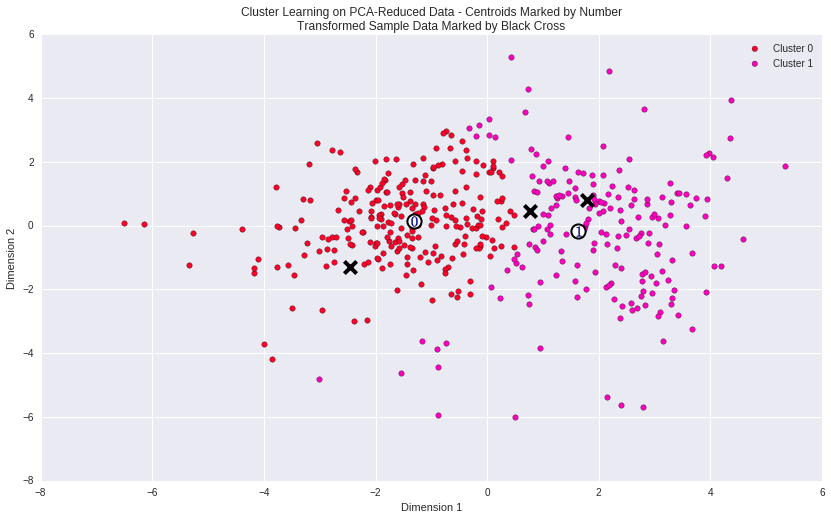

In [24]:
 #  Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2).fit(reduced_data)
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# find the cluster centers
centers = clusterer.means_
# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
    
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
display( data.mean().round())
display(data.median().round())

Fresh               12000.0
Milk                 5796.0
Grocery              7951.0
Frozen               3072.0
Detergents_Paper     2881.0
Delicatessen         1525.0
dtype: float64

Fresh               8504.0
Milk                3627.0
Grocery             4756.0
Frozen              1526.0
Detergents_Paper     816.0
Delicatessen         966.0
dtype: float64

In [26]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

#  Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
<table style="width:100%">
  <tr>
    <th>Type (All Data)</th><th>Fresh</th><th>Milk</th> <th>Grocery</th><th>Frozen</th><th>Detergents_Paper</th> <th>Delicatessen </th>
  </tr>
  <tr>
    <td>Mean</td><td>12000.0</td><td>5796.0</td><td>7951.0</td><td>3072.0</td><td>2881.0</td><td>1525.0</td>
  </tr>
  <tr>
     <td>Median</td><td>8504.0</td><td>3627.0</td><td>4756.0</td><td>1526.0</td><td>816.0</td><td>966.0</td>
  </tr>
</table>

Note: These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment.

<b>Segment 0:</b> Fre:4316.0 M:6347.0 Gro:9555.0 Fro:1036.0 Det_p:3046.0 Deli:945.0

0's center (mean) has higher purchasing amounts for Milk, Grocery, and Det_Paper compared to the total data's Mean value for those categories. This -especially the high grocery value- leads me to think this segment consist of retailers like grocery stores, convenience stores, etc.

<b>Segment 1:</b> Fre:8812.0 M:2052.0 Gro:2689.0 Fro:2058.0 Det_p:337.0 Deli:712.0

1's center (mean) has higher purchasing amounts for fresh and frozen when compared to the total data's MEDIAN values for these categories. This leads me to think of places that use large amounts of fresh and frozen food, which would be establishments that serve food like a restaurant or cafes.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
display(samples)
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,3477,894,534,1457,252,342
2,11210,3576,5119,561,1682,2398


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


In [28]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

Sample point 0 seems to be in Cluster 0 (Retiler). Milk, Gorcery, Det_paper, and Deli values are all higher than the center on Cluster 0 and cluster 1 centers are much smaller than cluster 0s on these categories. Therfore it should be in cluster 0. This is consistent with the prediction.

Sample point 1 seems to be in Cluster 1(Resturaunt/Cafe). Its low volume in all goods but Fresh put it closer to the centers of Cluster 1. Specifically, because cluster 0 has higher centers for Milk, Grocery, Det_paper, and Deli than cluster 1, and this sample has values lower than Cluster 1s mean in those catergories, then the sample must be in cluster 1. This is consistent with the prediction.

Sample point 2 seems to be in Cluster 1 (Resturaunt/Cafe). It is closer to the center of cluster 1 in catgories (by euclidean distance): Fresh,Milk, Grocery, Det_paper. However, that is not consitent with the prediction. This is b/c I assumed some basic distance relationship to cluster centers, where as in reality it is a gaussian probability distribution that assigns the centers. 

In [29]:
#see the prob of a sample point in each cluster
sample_preds_percent = clusterer.predict_proba(pca_samples)
print sample_preds_percent

[[ 0.19798309  0.80201691]
 [ 0.96067079  0.03932921]
 [ 0.48898334  0.51101666]]


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

It seems logical to beleive that customers that spend more money on goods would not be interested in changing their deleiver service to only 3 days a week as opposed to 5. These high consumption entitites, like resturaunts, probably need certain goods fresh and daily. However, low consumption entities may be interested in a service that only delivers 3 days a week (or every other work day). 

Assuiming this is true, we could perform A/B testing on what we found to be cluster 0. To do this we would need to split cluster 0 into two groups, a control (where we continue to deliver 5 days a week) and a treatment (where we deliver 3 days a week). We would want to split cluster 0 into even buckets (same number of obs) and make sure that the split data has nearly the same center (or other statisitcal similarities) pretesting. 

Then after some  time, we would want to see if the treatment is statistically significantly different to the control using hypothesis testing. For this case, if say the means (centers of the two groups weren't statistically significantly different) we could conclude moving to three day delivery would be beneficial because we would save on delivery costs yet still have the roughly the same sales. If, however, they were statisitcally significantly different and the control gave a better center (a distribution with better catergory means); we would not want to move to 3 days (though I guess if the delivery savings was really huge there maybe some difference we would, I will ignore this here). And in the last case, which I don't see as likely, imagine a world where moving to three days would improve sales numbers and is statisitically significant different, we would obviosly move to three day delivery.

Now just incase, I misunderstood the question. I will answer a slightly different question. Imagine, I wanted to know which of the two clusters would be affected by a switch to 3 day delivery. I would then split both cluster 0 and 1 into two subgroups A and B. Giving me four groupings. Cluster 0 A, Cluster 0 B, Cluster 1 A, and Cluster 1 B, where the A's are the controls and B's are the treatments. The splitting of clusters would be of equal obs (or one off if odd) and keep the centers close. Then we would just perform two different hypothesis tests on each cluster to see if the centers are statically significantly different. My intutiution would say that the cluster 1 treatment would be negatively significantly statisically different, but maybe not.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

I think the structure of the data could assist a supervised learning analysis by creating new dummy variables that identifies what cluster the data belongs to. This would be equivalent to running supervised learning on each cluster independtly (fitting a function to two seperate groups of data). If we beleive that there are drastic differences in the data, perfroming supervised learning (or fitting a function to each group seperately) may give better prediction of the new target we are hoping to predict. 

I could also imagine something more sophicated than just dummy variables. Since we used a GMM for clustering we could use the probabilities of what group they are in as opposed just the indicator 1 or 0 when perfroming supervised learning. (To grader: Does this exist and have a name?)

(To grader: would it be correct to call making a new feature this way a kernel? Technically the clusters do come from a function on the feaure space, so it seems it should to me)

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

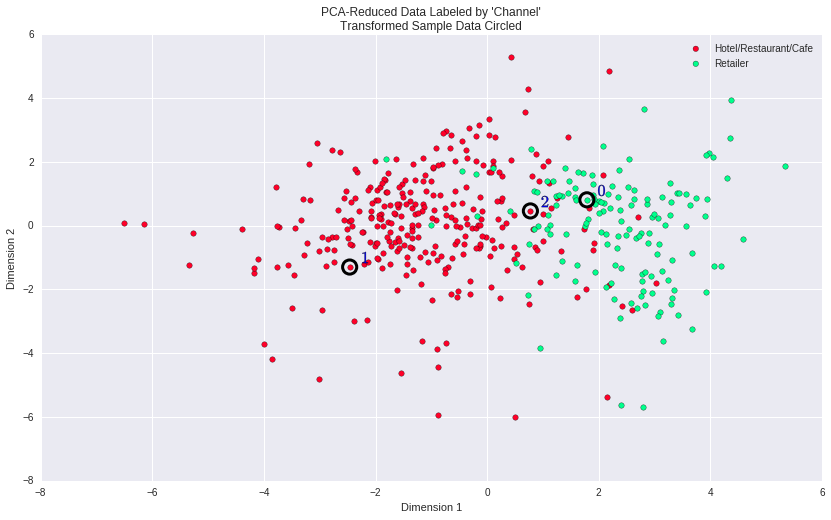

In [30]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The GMM with two clusters seems OK compared to the real data's seperation. Roughly, cluster 0 is retailers and cluster 1 is Hotels/Restaurants/Cafes. There are two obvious discrepancies. One is, if we look at the part of the graph with the most variance in the y plane, roughly around 0.25 in Dimension 1, these points are mostly Ho/Re/Ca but the GMM predicted them as cluster 0 (retail). The second is GMM does allow for soft boundaries, but the real data has some bleeding (data very far into another cluster) that GMM could not predict.

And now knowing the real data clusters, I think the previous classifications were relatively close to the real thing.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.